In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [5]:
data1 = pd.read_csv("E:\WhatsappAnalyzer\dataset\Emotion(happy).csv")
data2 = pd.read_csv("E:\WhatsappAnalyzer\dataset\Emotion(sad).csv")
data3 = pd.read_csv("E:\WhatsappAnalyzer\dataset\Emotion(angry).csv")

In [7]:
data = pd.concat([data1, data2, data3], ignore_index=True)
data.head()

,content,sentiment
0,Wants to know how the hell I can remember word...,happy
1,Love is a long sweet dream & marriage is an al...,happy
2,The world could be amazing when you are slight...,happy
3,My secret talent is getting tired without doin...,happy
4,"Khatarnaak Whatsapp Status Ever… Can\’t talk, ...",happy


e:\WhatsappAnalyzer\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\WhatsappAnalyzer\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
e:\WhatsappAnalyzer\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sentiment', ylabel='count'>

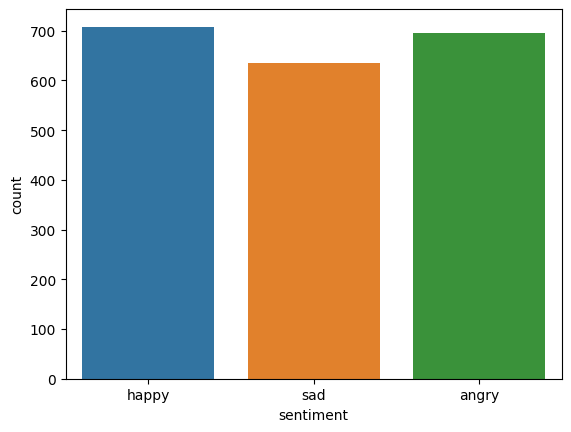

In [8]:
sns.countplot(x='sentiment',data=data)

In [9]:
X = data.content
Y = data.sentiment
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [11]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [12]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [13]:
model = RNN()
model.summary()
model.compile(loss='sparse_categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 3)                 771   

In [14]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=20,
          validation_split=0.2)

Epoch 1/20
11/11 [==============================] - 16s 744ms/step - loss: 1.0945 - accuracy: 0.3773 - val_loss: 1.0894 - val_accuracy: 0.4524
Epoch 2/20
11/11 [==============================] - 4s 369ms/step - loss: 1.0759 - accuracy: 0.4971 - val_loss: 1.0624 - val_accuracy: 0.4611
Epoch 3/20
11/11 [==============================] - 5s 422ms/step - loss: 1.0303 - accuracy: 0.5202 - val_loss: 1.0006 - val_accuracy: 0.5216
Epoch 4/20
11/11 [==============================] - 4s 355ms/step - loss: 0.9431 - accuracy: 0.5707 - val_loss: 0.9198 - val_accuracy: 0.6110
Epoch 5/20
11/11 [==============================] - 4s 373ms/step - loss: 0.8444 - accuracy: 0.6364 - val_loss: 0.8363 - val_accuracy: 0.6369
Epoch 6/20
11/11 [==============================] - 6s 526ms/step - loss: 0.7526 - accuracy: 0.6818 - val_loss: 0.7872 - val_accuracy: 0.6830
Epoch 7/20
11/11 [==============================] - 5s 467ms/step - loss: 0.6340 - accuracy: 0.7540 - val_loss: 0.7604 - val_accuracy: 0.6772
Epoch

In [15]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [16]:
accr = model.evaluate(test_sequences_matrix,Y_test)

10/10 [==============================] - 1s 51ms/step - loss: 1.1335 - accuracy: 0.7059


In [17]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 1.134
  Accuracy: 0.706


In [18]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [19]:
accr = model.evaluate(test_sequences_matrix,Y_test)

10/10 [==============================] - 1s 54ms/step - loss: 1.1335 - accuracy: 0.7059


In [20]:
from tensorflow import keras

# Save model
model.save('my_model.h5')

# Load model
loaded_model = keras.models.load_model('my_model.h5')

e:\WhatsappAnalyzer\venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
loaded_model = keras.models.load_model('my_model.h5')

In [22]:
loaded_model